# Vienkāršākā taisnes piedzīšana. Cost / Loss funkcija  

## Dotā problēma  
Pieņemsim, ka mums ir punktu mākonis, kurš šķietami labi atbilst lineārai sakarībai.   
Pieņemsim, ka mums ir sekojošs grafiks (tikai grafiks), kurā mums ir atlikti dati par degviela patēriņiem relatīvi pret nobrauktiem kilometriem kādai vienāda modeļa un gada automašīnu grupai.

(100,) (100,)


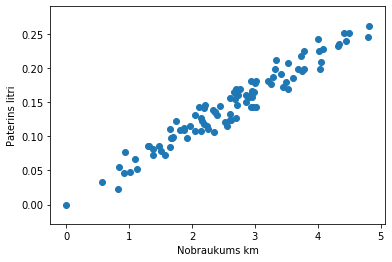

In [2]:
%matplotlib inline


df = pd.
plt.xlabel('Nobraukums km')
plt.ylabel('Paterins litri')
plt.scatter(X, Y)

In [3]:
# # Ar sklearn lineārā modeļa bibliotēku apskatīsim kādu slīpuma koeficientu 
# # varam sagaidīt no šiem datiem, rēķinot manuāli. 
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=False)
# # Reshape nepieciešams, lai kolonnu vektoru pārvērstu par rindiņu vektoru
reg.fit(df['X'].values.reshape(-1,1),df['Y'].values.reshape(-1,1))
reg.coef_


array([[0.05512613]])

In [5]:
import sympy
from sympy import symbols, exp, Eq, Sum, Function
from sympy import symbol
from sympy.abc import a,b,i,j,l,m,n,k, x

y, Y, x, X, P, n, N, E, var, Cost, sigma, Sigma, lmbd = symbols('y Y x X P n N E var Cost σ Σ λ')

f = Function('f')

* **Cik litrus iztērēs VW passat automašīna, kas nobrauks 140 km? Kā mēs to varētu aprēķināt tikai no šiem datiem?**

Mēs uz šo jautājumu varētu atbildēt, ja iegūtu kādu vienkāršu skaitlisku sakarību, kura kā ievadu ņem nobrauktos kilometrus un kā izvadu atgriež iztērēto degvielas apjomu litros. Šai sakarībai arī labi būtu jāapraksta mūsu datus un tādējādi, ja mums nav iemesla domāt, ka degvielas patērēšanas mehānisms būtiski mainās pie lielākiem nobraukumiem, mēs varētu šo sakarību arī ekstrapolēt nobraukumiem, kas pirms tam nav redzēti.  


Ir redzams, ka šos datus labi var aprakstīt kāda taisne ar pozitīvu slīpuma koeficientu.
Vispārīgs taisnes vienādojums (ar 1 neatkarīgo un 1 atkarīgo mainīgo, tātad 2 dimensijās) ir sekojošs: 

In [6]:
Eq(y,a*x+b)

Eq(y, a*x + b)

**y** būs izvadītā vērtība un **x** ir ievadītā vērtība.  
Būtu vienīgi jāatrod koeficienti a un b, kas veido taisni, kas atbilst datiem un ar šo 'problēmu' ir saistīti sekojošie jautājumi:  
* **Kā atrast šo koeficientu vērtības?** Minēt? Izveidot algoritmu? Kā šim algoritmam būtu jāizskatās? Varbūt var analītiski?
* **Kā pateikt, ka esam atraduši labu taisni? Kā salīdzināt divus koeficientu komplektus?** Būtu jāizdomā metrika, kas apraksta to, cik labi taisne atbilst punktiem.
* **Kā pateikt, ka esam atraduši labāko iespējamo taisni?**  

Sāksim vispirms ar otro jautājumu.  

## Kā pateikt, ka esam atraduši labu taisni? Kā novērtēt taisnes 'labumu'?  

/home/skrs/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/skrs/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


w[0]: 0.393906  b: -0.031804


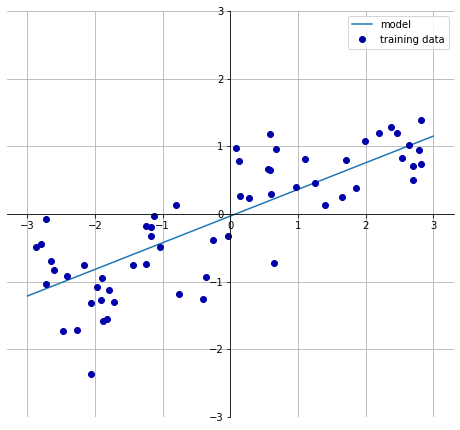

In [7]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

Šādā piemērā ir uzvilkta kāda taisne ar slīpuma koeficientu **w\[0\]** un brīvo locekli **b**, kas aptuveni apraksta punktu mākoņa lineāro sakarību.  
Šādā vienkāršā piemērā mēs vizuāli ļoti labi varam novērtēt vai taisne apraksta šos punktus labi vai slikti un 2 dimensijās mēs taisnes koeficientus pat varētu uzminēt, bet ko darīt situācijā, kad mums ir 5 vai vairāk neatkarīgiem mainīgie? 5+1 dimensijās ar aci pateikt nevarētu. To var izdarīt ieviešot funkciju, kura atgriež skaitli, kurš raksturo cik labi vai slikti taisne atbilst punktiem.  

Šādu funkciju sauc par **Cost** jeb **Loss** funkciju. (latviski Zaudējumu funkcija(?))


### Kritērijs labai taisnei - Cost funkcija. Koncepts un uzvedība.  
Cost funkcijas ir izmantotas visa veida machine learning un klasiskās statistikas problēmās. Regresijas problēmās (Lineārās un nelineārās piedzīšanas, neironu tīkli) tipiski izmanto savādākas Cost funkcijas kā klasifikācijas/klasterizācijas problēmās (K-means, K-nn, DecisionTree u.t.t.)
Priekš regresijas/neironu tīklu uzdevumiem tipiski tiek izmantotas šādas:  
* Klasiskā kvadrātiskā Cost funkcija, arī pazīstama mazāko kvadrātu metode, 
* Vidējā absolūtā kļūda,
* [Cross-Entropy Loss funkcija](https://en.wikipedia.org/wiki/Cross_entropy)  
* Eksponenciālā kļūda,
* [U.C.](https://stats.stackexchange.com/a/154880)

Cost funkcija vienmēr izmanto modeli, kuram jāpiedzen parametri.  
Cost funkcija atgriež skaitli, kurš raksturo modeļa outputa nobīdi no datiem.  
Cost funkcijai vienmēr jāatbilst sekojošiem kritērijiem:  
* Funkcija atgriež vienu vienīgu skaitli, neatkarīgi no koeficientu un datu punktu skaita (Funkcija ir skalāra),
* Funkcija ir uzrakstāma kā vidējā vērtība
* Funkcijai jābūt gludai (Precīzāk, ar definējamu, galīgu slīpuma koeficientu visur)
* Funkcijas vērtība ir lielāka, ja modelis datiem atbilst sliktāk,
* Funkcijas vērtība ir mazāka, ja modelis datiem atbilst labāk  


!!  
Uz reāliem datiem cost funkcijas vērtība nemēdz sasniegt nulli, ja vien tie perfekti neapraksta datus (ārkārtīgi mazvarbūtīgi, pat aizdomīgi, droši vien falsificēti dati) vai arī modelim ir vairāk parametru, kā mums ir datu punktu (Caur jebkuriem diviem punktiem ir iespējams novilkt perfektu taisni, caur jebkuriem trim kvadrātisku fciju u.t.t.)

###  Vienkāršākais Cost funkcijas piemērs - kvadrātiskā kļūda  
Apskatīsim vienkāršu cost funkcijas piemēru - kvadrātisko kļūdu. Sauktu arī par mazāko kvadrātu metodi.   
No sākuma mums vajag tabulu ar datiem, kuru tad izmantosim, lai piedzītu taisni. Izmantosim degvielas patēriņa datus, kurus jau uzģenerējām.

In [ ]:
df

Vispārināsim modeļa konceptu.  
Mēs vēlamies atgriezt skaitli, atkarībā no inputa **x** un koeficientiem **a** un **b**. Mūsu funkcijai var būt patvaļīgs koeficientu skaits un patvaļīgs neatkarīgo mainīgo skaits.  


Neatkarīgos mainīgos apzīmēsim ar **x_j** un koeficientus ar **w**.  

Pēc šādas notācijas, mums ir **j** neatkarīgie mainīgie un **k** koeficienti:

In [8]:
x_i, y_i,x_j,w_k = symbols('x_i y_i x_j w_k')
f(x_j,w_k)

f(x_j, w_k)

Mūsu lineārais modelis y = b + ax, tad būtu pierakstāms šādi:

In [9]:
Eq(symbols('y'),symbols('w_1')*symbols('x') + symbols('w_0'))

Eq(y, w_0 + w_1*x)

Datu punktu skaitu apzīmēsim ar **l** (mazais L) un datu punktu vektoru apzīmēsim ar $\hat{y}$  

**Galvenā kvadrātiskās kļūdas ideja ir aprēķināt datu punktu $\hat{y}$ un modeļa paredzējuma starpību kvadrātus. Jo labāka būs taisne, jo mazāka būs summa.**

In [10]:
Eq(symbols('diff_i'),symbols('\hat{y_i}') - symbols('y_i'))

Eq(diff_i, \hat{y_i} - y_i)

In [11]:
Eq(symbols('diff_i'),symbols('\hat{y_i}') - (symbols('w_1')*symbols('x_i') + symbols('w_0')))

Eq(diff_i, \hat{y_i} - w_0 - w_1*x_i)

In [12]:
Eq(Cost,Sum(symbols('diff_i^2'),(i,1,symbols('l'))))

Eq(Cost, Sum(diff_i^2, (i, 1, l)))

Ja mēs patvaļīgi izvēlamies parametrus, tad iegūsim kādu cost funkcijas novērtējumu.

In [13]:
df

,X,Y
0,2.193437,0.117640
1,3.529629,0.169260
2,2.955331,0.157031
3,1.739844,0.122157
4,1.665204,0.097959
...,...,...
95,1.387840,0.082032
96,2.190249,0.142000
97,2.909356,0.157315
98,0.939092,0.076629


In [15]:
# Uzdevums: 
# y = ax + b
# Sekojot instrukcijām, papildiniet funkciju cost, kas kā argumentus ņem 
# DataFrame objektu df un divus koeficientus. 
# Funkcijai jāatgriež vērtība, kas tiek aprēķināta ar kvadrātisko kļūdu.

def cost(dati,a,b):
    # 1.Vispirms, izmantojot modeļa parametrus a un b, izveidojiet un aizpildiet kolonnu 'modelis` ar modeļa vērtībām.
    
    # 2. Šeit jau ir implementēta kvadrātiskā starpība un tās ielikšana kolonnā 'diff^2'.
    dati['diff^2'] = (dati['Y'] - dati['modelis'])**2
    # 3. Sasummējiet un atgrieziet diff^2 kolonnas vērtības
    return dati['diff^2'].sum()


# Izpildot cost funkciju ar a=0.05 un b=0, cost funkcija aprēķinās punktu nobīdēs kvadrātisko summu no datiem.
cost(df,0.05,0)

In [ ]:
# !! Uzdevums:
# Paspēlējieties ar dažādām a un b vērtībām, mēģiniet atrast labāko kombināciju.
cost(df,0.0,0)

Esam iepazinušies ar cost funkcijas un modeļa konceptu. Atbildēsim tagad uz pirmo jautājumu.
## Kā atrast modeļa koeficientu vērtības?  

### Minēšana
Paspēlējoties ar koeficientu a un b vērtībām, mēs minējām vērtības un redzējām, ka cost funkcija mums atgrieza vērtības pie dažādiem koeficientu pāriem.  
Cik efektīva vispār varētu būt minēšana?  
Tipiskā programmētāja pieeja šādā gadījumā būtu automatizēt minēšanu un iziet cauri lielam skaitam parametru kombināciju, pārbaudot katru kombināciju un atceroties pie kādiem parametriem ir bijusi zemākā cost funkcijas vērtība. Šāda metode patiesībā ir diezgan efektīva.  

Metodi, kad mēs ejam cauri dažādām inputu kombinācijām un meklējam kādu kombināciju vai kombinācijas, kas atgriež vēlamo outputu vai outputus sauc par **grid search**.

In [ ]:
arange = np.linspace(0,1,101) # 3 argumenti: start, stop, elementu skaits. Kādus intervālus izvēlēties? Cik blīvus?
brange = np.linspace(0,1,101)

mincost = 500000
coefs = []
costs = []
for a in arange:
    for b in brange:
        newcost = cost(df,a,b)
        if newcost <= mincost:
            coefs.append([a,b])
            costs.append(newcost)
            mincost = newcost

print(coefs[-1], costs[-1])

In [ ]:
# Jautājums: 
# Kāda ir sakarība starp režģa blīvumu un cost funkcijas izsaukšanas reižu skaitu? 

In [16]:
# Jautājums
# Ar tādu pašu režģa blīvumu un intervālu galapunktiem, 
# kāda būtu šī sakarība, ja lineārajai cost funkcijai būtu 4 neatkarīgi mainīgie t.i. 4 koeficienti, kurus fitot? 

Minēšana ar grid search, lai gan strādā, pieder pie 'brute force' algoritmu klases un ir ar ārkārtīgi sliktu [algoritmisko laika sarežģītību](https://en.wikipedia.org/wiki/Time_complexity).  

Eksistē efektīvāki risinājumi.

### Gradient descent  
Pie vienas fiksētas datu kopas, variējot a un b parametrus, mēs iegūstam dažādas Cost funkcijas vērtības, atkarībā no a un b

In [17]:
Eq(symbols('Cost_x=const'),f(symbols('w'),symbols('x_const')))

Eq(Cost_x=const, f(w, x_const))

Kas novienkāršojās uz:  

In [18]:
Eq(symbols('Cost'),f(symbols('w')))

Eq(Cost, f(w))

Šeit koeficienti un neatkarīgie mainīgie ir itkā mainījušies lomām. w šeit ir divas komponentes - a un b un tagad Cost ir divu argumentu funkcija. Kļūdas funkcija izskatās aptuveni šādi

In [ ]:
import PyQt5 # Iespējams ir jāinstalē ar pip
%matplotlib qt5

from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
# https://stackoverflow.com/questions/56222259/valueerror-unknown-projection-3d-once-again
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.linspace(-1,1,101)+0.05
Y = np.linspace(-1,1,101)
# X = np.arange(-5, 5, 0.1)
# Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
R = (X**2 + Y**2) / 5
Z = R
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
# A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Mēs gribētu kaut kā no dotas funkcijas atrast parametru vērtības, kur kļūdas funkcijai ir vismazākā vērtība. 
Funkcijas minimuma atrašana ir problēma, ko var risināt gan analītiski, gan algoritmiski, bet šo problēmu risinot ir daži izaicinājumi.  
Funkcijām var būt **globālie minimumi** un **lokālie minimumi**.  
[<img src="https://upload.wikimedia.org/wikipedia/commons/6/68/Extrema_example_original.svg">](avots)


Vizuāli, atrast minimumus ir ļoti viegli, bet, ja mums būtu kādi 15 koeficienti (piem. piecpadsmit pazīmes lineārā modelī), tad ar aci pateikt vairs nav iespējams. To ir nepieciešams vispārināt. Pieiesim problēmai ar algoritmu, ko sauc par gradient descent. 

[Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent) paļaujas uz to, ka funkcijai, kura jāminimizē, eksistē nebezgalīgi slīpuma koeficienti visā vērtību apgabalā un to, ka slīpuma koeficienti minimumos ir vienādi ar nulli.  
Algoritma galvenā ideja ir paņemt kādu patvaļīgu parametru kombināciju, atrast visiem parametriem slīpuma koeficientus relatīvi pret funkciju un tad atjaunināt paņemtā punkta koordinātas(parametru vērtības) ar negatīvu slīpuma koeficienta vērtību reizinātu ar nelielu, pozitīvu, reālu skaitli (saukts par learning rate), efektīvi mainot parametra vērtību virzienā, kurā ir kāds lokālais minimums.

In [19]:
def find_minima(costfunc,data,numiters = 60,rand=False,fixeda=0.09, fixedb=0.01):
    if rand:
        # Paņem random sākotnējās a un b vērtības, teiksim, ka intervālā no 0 līdz 1
        a = random.random()
        b = random.random()
    else:
        # Vai arī paņem mūsu padotas koeficientu vērtības
        a=fixeda
        b=fixedb
    # Teiksim, vēlamies veikt kādu skaitu iterāciju, lai samazinātu kļūdas funkcijas vērtību.
    for k in range(0,numiters):
        # 1. Aprēķina slīpuma koeficientu.
        # Slīpuma koeficienta aprēķināšana ir jāveic nedaudz viltīgi. 
        # Lai aprēķinātu slīpumu kādā punktā, mēs paņemam nevis cost funkcijas vērtību pašā punktā, 
        # bet gan divas vērtības punkta apkārtnē. Pieņemsim, ka +/- 0.01 lielā apkārtnē
        solis = 0.01
        # Definē learning rate, būtu jābūt mazākam kā solim
        lr = 0.001

        slipums_viens_a = costfunc(data,a-solis,b)
        slipums_divi_a = costfunc(data,a+solis,b)
        slipums_a = (slipums_divi_a - slipums_viens_a) / (2* solis) # delta y dalīta ar delta x, lineārs tuvinājums slīpumam

        slipums_viens_b = costfunc(data,a,b-solis)
        slipums_divi_b = costfunc(data,a,b+solis)
        slipums_b = (slipums_divi_b - slipums_viens_b) / (2* solis) # delta y dalīta ar delta x, lineārs tuvinājums slīpumam
        
        # 2. Update`o parametrus, izmantojot aprēķinātos slīpuma koeficientus.
        a_new = a - slipums_a * solis * lr
        b_new = b - slipums_b * solis * lr
        print(costfunc(data,a_new,b_new)," , ",a_new,b_new)
        
        # 3. Piešķir a un b update`otās vērtības
        a = a_new
        b = b_new
    return (a_new,b_new)

In [21]:
find_minima(cost,df,numiters=90)

In [ ]:
# Jautājums: 
# Kādu iterāciju skaitu izvēlēties? Vai var izvēlēties iterāciju skaitu kā savādāk? Dinamiski?

# Uzdevums:
# Nokopējot un rediģējot funkciju find_minima(...), izveidojot find_minima_cond(...), kura izmanto nevis fiksētu iterāciju skaitu,
# bet gan kādu apstāšanās nosacījumu.

Viss kods šajā notebookā ir paredzēts vairāk konceptu demonstrācijām un bibliotēkas to implementē daudz skaitliski efektīvāk. Visas šīs mūsu darbības ir veicamas divās rindiņās ar bibliotēku sklearn.  

Stāsta morāle - nav nepieciešams riteni izgudrot no jauna un lielāko daļu koda, ko jums jebkad vajadzēs kāds cits jau kādreiz ir uzrakstījis.

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=False)
# Reshape nepieciešams, lai kolonnu vektoru pārvērstu par rindiņu vektoru
reg.fit(df['X'].values.reshape(-1,1),df['Y'].values.reshape(-1,1))
reg.coef_